# Segmentation & Morphological Operations

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = './data/images' # Change this, according to your images' directory path

13. Segmentation - Thresholding

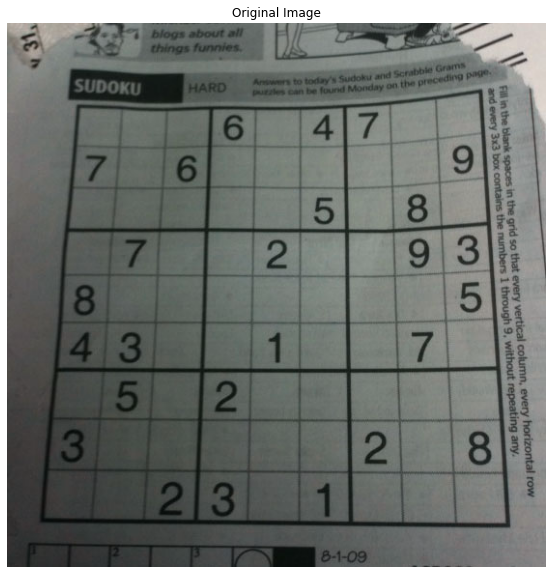

In [18]:
# Read the iamge
filename = 'sudoku.png'
img = cv2.imread(os.path.join(imagesDir, filename))   # Thresholding is done on grayscale images

# if image is not read properly, print error message and exit
if img is None:
    print("Could not read the image.")
else:
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

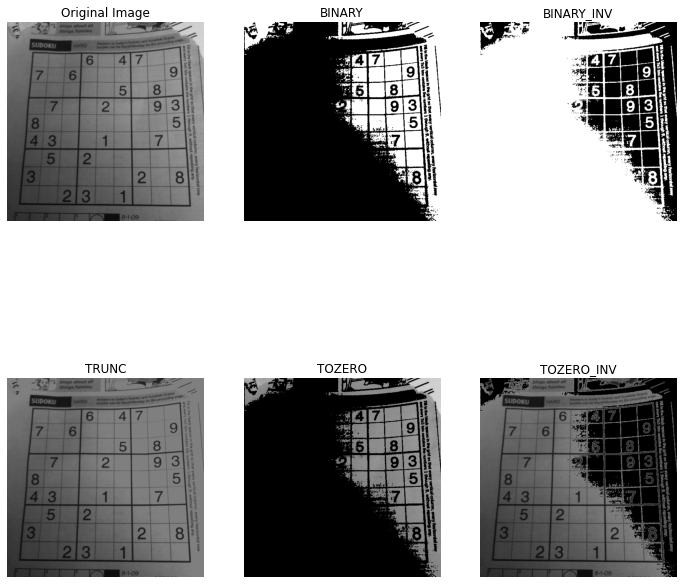

In [22]:
# Let's first compare the different simple thresholding methods
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

# Plot the results
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]

# set figure size
plt.rcParams["figure.figsize"] = (12, 12)
# plot the images
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.axis('off')

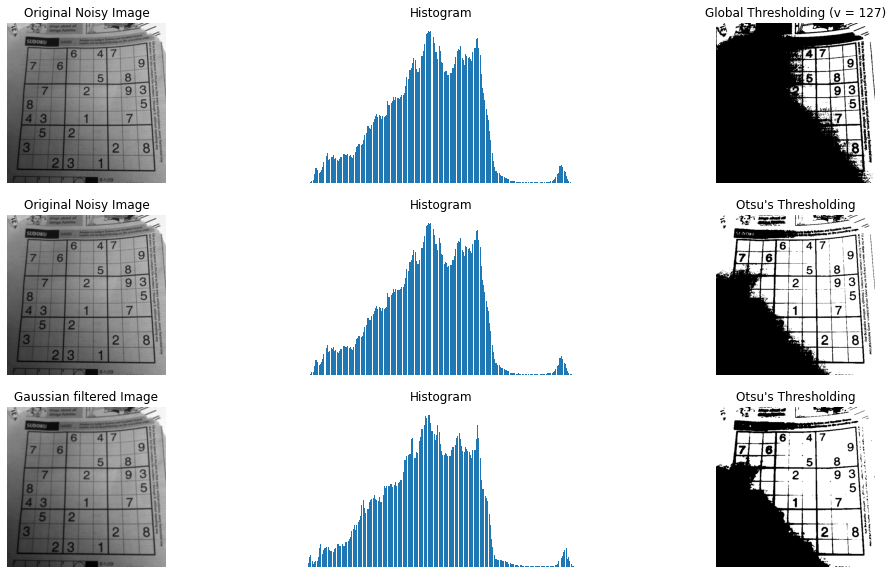

In [31]:
# In Global Thresholding, we used an arbitrary chosen value as threshold. Otsu's method avoids having to choose a value and determines it automatically.
# Essentially, it views the image as a histogram and tries to find an optimal threshold value that minimizes the intra-class variance. That is, a threshold value that splits the
# image into two parts with the least amount of variance between them.

# Otsu's thresholding
ret, otsuTh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering (5x5)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, otsuTh2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot the results
titles = [
            'Original Noisy Image', "Histogram", 'Global Thresholding (v = 127)',
            'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
            'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"
        ]
images = [
            gray, 0, thresh1,
            gray, 0, otsuTh1,
            blur, 0, otsuTh2
        ]

# set figure size
plt.rcParams["figure.figsize"] = (18, 10)
# plot the images
for i in range(3):
    plt.subplot(3, 3, i*3+1)
    plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3])
    plt.axis('off')

    plt.subplot(3, 3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1])
    plt.axis('off')

    plt.subplot(3, 3, i*3+3)
    plt.imshow(images[i*3+2], 'gray', vmin=0, vmax=255)
    plt.title(titles[i*3+2])
    plt.axis('off')


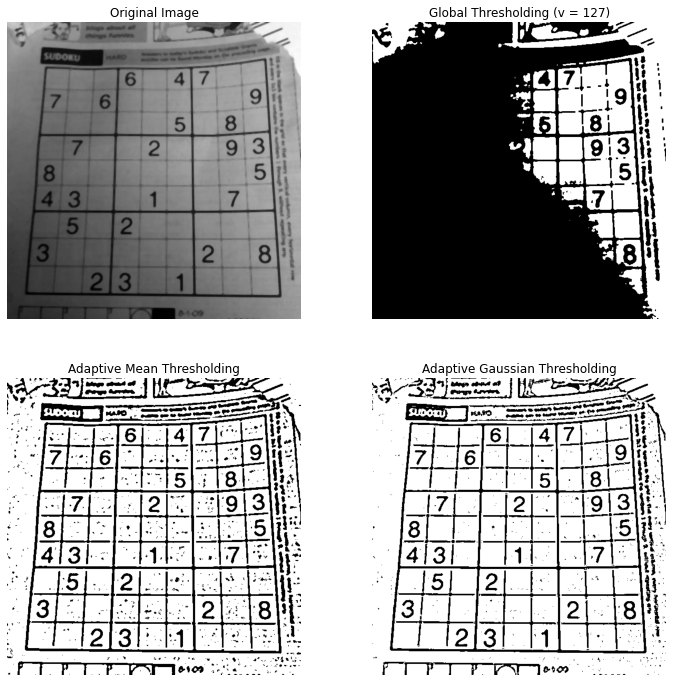

In [34]:
# Previously, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. 
# In that case, Adaptive Thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. 
# So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

# Adaptive Thresholding
# blockSize: size of a pixel neighborhood that is used to calculate a threshold value for the pixel
# C: constant subtracted from the mean or weighted mean
def adaptiveThresholding(img, blockSize, C):
    # Blurs the image to remove noise
    smoothImg = cv2.medianBlur(img, 5)

    # Global thresholding
    ret, th_global = cv2.threshold(smoothImg, 127, 255, cv2.THRESH_BINARY)

    # Adaptive thresholding
    # Adaptive Mean Thresholding
    th_adaptive1 = cv2.adaptiveThreshold(smoothImg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)
    # Adaptive Gaussian Thresholding
    th_adaptive2 = cv2.adaptiveThreshold(smoothImg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

    # Plot the results
    titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [smoothImg, th_global, th_adaptive1, th_adaptive2]

    # set figure size
    plt.rcParams["figure.figsize"] = (12, 12)
    # plot the images
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.axis('off')

adaptiveThresholding(gray, 11, 2)


14. Segmentation - K-Means

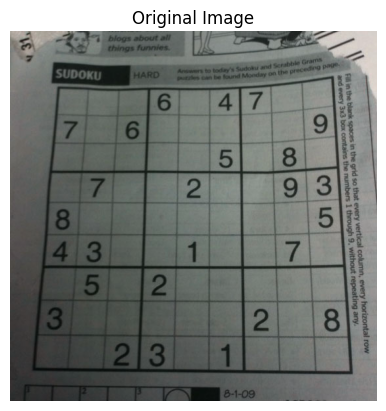

In [3]:
# Read the image
filename = 'sudoku.png'
img = cv2.imread(os.path.join(imagesDir, filename))   # Segmentation is done on grayscale images

# if image is not read properly, print error message and exit
if img is None:
    print("Could not read the image.")
else:
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


pixel_values shape:  (314154, 3)
centers:  (4, 3)
labels:  (314154, 1)


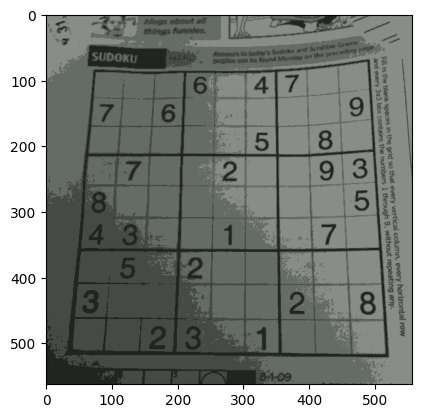

In [18]:
# Reshape the image to a 2D array of pixels and 3 color values (RGB)
# (height * width, 3) This is needed to apply kmeans()
pixel_values = img.reshape((-1, 3))
# Convert to float type
pixel_values = np.float32(pixel_values)
print("pixel_values shape: ", pixel_values.shape)

# Define the criteria to stop the K-means algorithm
# (Criteria, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.5)
# Set flags - Specify how initial centers are taken
flags = cv2.KMEANS_RANDOM_CENTERS
# Number of clusters (K)
K = 4

# Apply K-Means
retval, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, flags)

# Convert back to 8 bit values
centers = np.uint8(centers)
print("centers: ", centers.shape)

print("labels: ", labels.shape)


segmented_data = centers[labels.flatten()]  # Mapping labels to center points 
segmented_image = segmented_data.reshape((img.shape))  # Reshaping data into the original image dimensions

# Plot the results
plt.imshow(segmented_image)


15. Segmentation - Watersheds

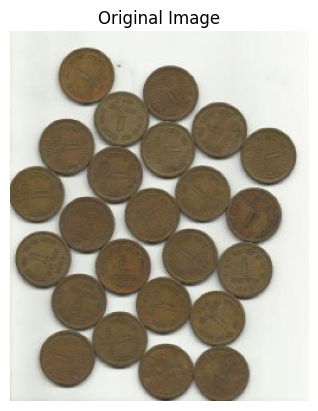

In [29]:
# Read the image
filename = 'watershed_coins.jpg'
img = cv2.imread(os.path.join(imagesDir, filename))
# if image is not read properly, print error message and exit
if img is None:
    print("Could not read the image.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # matplotlib uses RGB format
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret 162.0


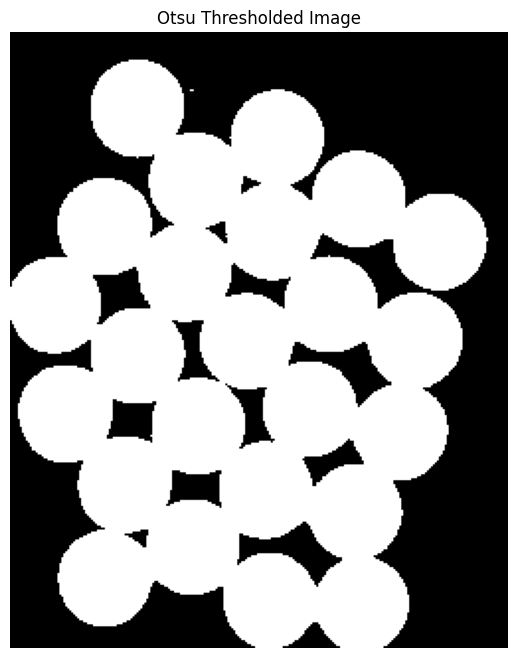

In [57]:
# We start by finding an approximate estimate of the coins. We'll use Otsu's Binarization thresholding for this.
# We use THRESH_BINARY_INV, since the background is brighter than the coins.
threshVal, threshImg = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Show the result
plt.imshow(threshImg, 'gray')
plt.title("Otsu Thresholded Image")
plt.axis('off')
plt.show()

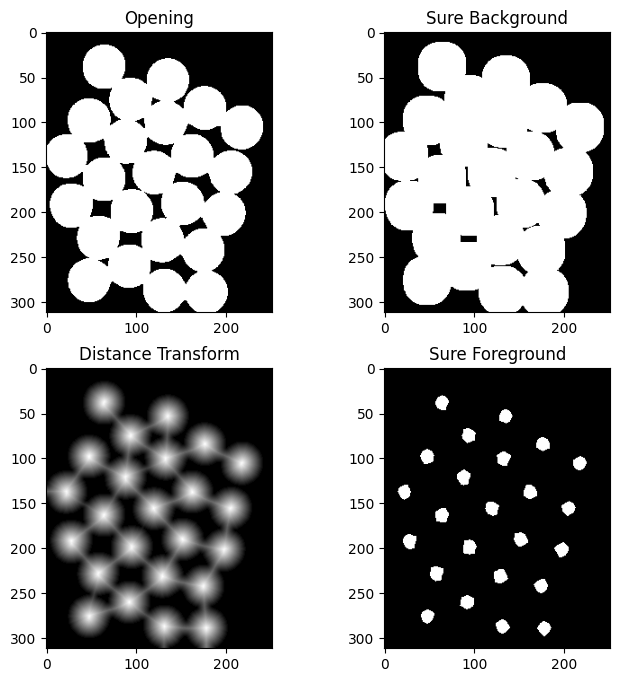

In [43]:
# Now we need to remove any small white noise in the image. We'll use morphological opening for that. TO remove any small holes in the object, we cna use morphological closing.
# So, we will end up with:
# Foreground -> Region near the center of objects we are sure its foreground
# Background -> Region much away from the objects we are sure its background
# Unknown -> Region which may be foreground or background

# We will use the distance transform to extract the area we are use its foreground and dilation to extract the area we are sure its background.

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(threshImg, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# sure foreground area. Erosion could be used instead of distance transform if we are sure that the objects are not touching each other.
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Show the results
plt.rcParams["figure.figsize"] = (8, 8)
plt.subplot(221), plt.imshow(opening, 'gray'), plt.title("Opening")
plt.subplot(222), plt.imshow(sure_bg, 'gray'), plt.title("Sure Background")
plt.subplot(223), plt.imshow(dist_transform, 'gray'), plt.title("Distance Transform")
plt.subplot(224), plt.imshow(sure_fg, 'gray'), plt.title("Sure Foreground")
plt.show()

markers shape (312, 252)


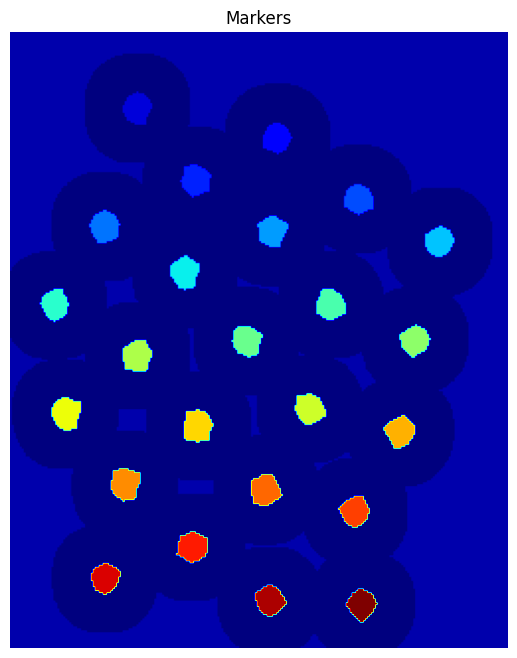

In [55]:
# Now we know for sure which are regions of coins and background. What is left is to discover the unknown regions. For that,
# we will create a market (array with the same size of the original image) and label the regions inside it. The regions we know for sure (foreground and background) 
# are labelled with any positive integers, but different integers, and the area we don't know is labelled with 0. For this, we will apply the cv2.connectedComponents()
# It labels background with 0, and other objects starting from 1, so we will add 1 to all labels to make sure the background is not 0, but 1.

# Marker labelling
# This will label the regions with different integers, using the sure foreground image.
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that background is not 0, but 1
markers = markers + 1

# Mark the unknown regions with zero
markers[unknown == 255] = 0

print("markers shape", markers.shape)

# Display the markers
plt.imshow(markers, 'jet')  # jet is a colormap
plt.title("Markers")
plt.axis('off')
plt.show()

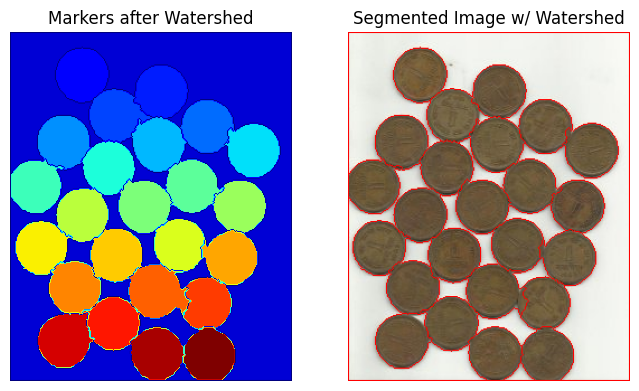

In [60]:
# Now that our marker is ready, we can apply the Watershed algorithm. The marker image will be modified and the boundary region marked with -1.
markers = cv2.watershed(img, markers)

# Change the color of the pixels that are marked as boundary
img[markers == -1] = [255, 0, 0]  

# Display the results
plt.subplot(1, 2, 1), plt.imshow(markers, 'jet'), plt.title("Markers after Watershed"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img), plt.title("Segmented Image w/ Watershed"), plt.axis('off')

plt.show()

16. Segmentation - Meanshift

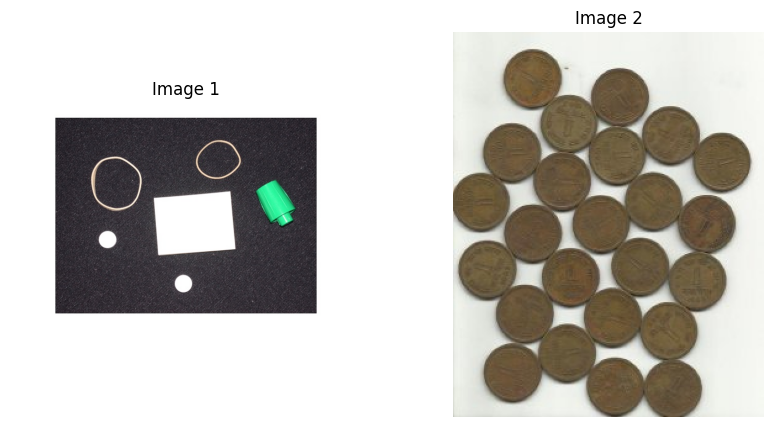

In [12]:
def load_img(path):
    img = cv2.imread(path)
    # if image is not read properly, print error message and exit
    if img is None:
        print("Could not read the image.")
        return None

    return img

img1 = load_img(os.path.join(imagesDir, "roundObjects_02.jpg"))
img2 = load_img(os.path.join(imagesDir, "watershed_coins.jpg"))

# Convert to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Show images
plt.rcParams["figure.figsize"] = (10, 5)
plt.subplot(1, 2, 1), plt.imshow(img1), plt.title("Image 1"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(img2), plt.title("Image 2"), plt.axis('off')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

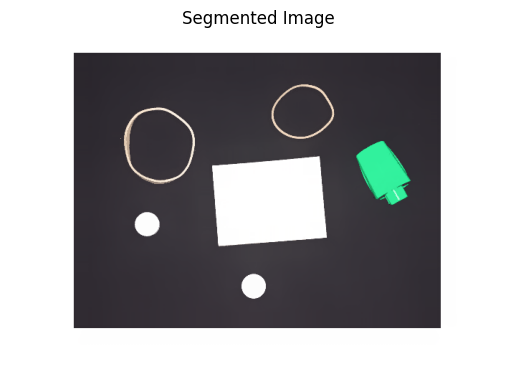

In [7]:
# segment the image using the Meanshift algorithm
segmented1 = cv2.pyrMeanShiftFiltering(img1, 21, 51)
segmented2 = cv2.pyrMeanShiftFiltering(img2, 21, 51)

# Display the results
plt.rcParams["figure.figsize"] = (10, 5)
plt.subplot(1, 2, 1), plt.imshow(segmented1), plt.title("Segmented 1"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(segmented2), plt.title("Segmented 2"), plt.axis('off')